<a href="https://colab.research.google.com/github/ManojAnaparthi/ML_ASSIGNMENT_2_MAPEX/blob/main/Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK-4a

Epoch 0/1001, Loss: 100.79637908935547
Epoch 100/1001, Loss: 0.016581976786255836
Epoch 200/1001, Loss: 0.00839164201170206
Epoch 300/1001, Loss: 0.006132126785814762
Epoch 400/1001, Loss: 0.0050338138826191425
Epoch 500/1001, Loss: 0.0044290442019701
Epoch 600/1001, Loss: 0.004166950471699238
Epoch 700/1001, Loss: 0.003972423728555441
Epoch 800/1001, Loss: 0.003764490596950054
Epoch 900/1001, Loss: 0.003554749069735408
Epoch 1000/1001, Loss: 0.0033707916736602783
Epoch 0/1001, Loss: 100.98468780517578
Epoch 100/1001, Loss: 0.015036611817777157
Epoch 200/1001, Loss: 0.00873605441302061
Epoch 300/1001, Loss: 0.005502595566213131
Epoch 400/1001, Loss: 0.0048781391233205795
Epoch 500/1001, Loss: 0.004456013441085815
Epoch 600/1001, Loss: 0.003971247002482414
Epoch 700/1001, Loss: 0.0035872056614607573
Epoch 800/1001, Loss: 0.003346686949953437
Epoch 900/1001, Loss: 0.0032035652548074722
Epoch 1000/1001, Loss: 0.0031037419103085995
Epoch 0/1001, Loss: 100.15394592285156
Epoch 100/1001, Los

Epoch 1000/1001, Loss: 0.004085605964064598


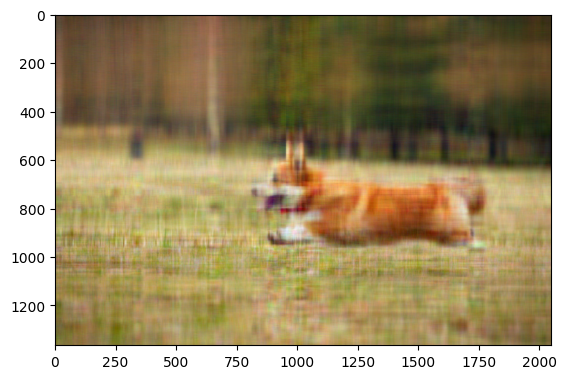

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torch
import os


# Download image if not present
if os.path.exists('dog.jpg'):
    print('dog.jpg exists')
else:
    os.system('wget https://segment-anything.com/assets/gallery/AdobeStock_94274587_welsh_corgi_pembroke_CD.jpg -O dog.jpg')

# Load and normalize the image
image = torchvision.io.read_image('dog.jpg').float() / 255.0  # Normalize to [0, 1]
import matplotlib.pyplot as plt
image=image.permute(1, 2, 0)
plt.imshow(image)
R = image[:, :, 0].numpy()
G = image[:, :, 1].numpy()
B = image[:, :, 2].numpy()

def matrix_factorization(R, r, lr=0.05, epochs=1001):
    m, n = R.shape
    W = torch.randn(m, r, requires_grad=True)
    H = torch.randn(r, n, requires_grad=True)
    optimizer = torch.optim.Adam([W, H], lr=lr)
    for epoch in range(epochs):
        optimizer.zero_grad()
        R_hat = torch.mm(W, H)
        loss = torch.mean((R_hat - torch.tensor(R)) ** 2)  # Mean Squared Error
        loss.backward()
        optimizer.step()
        if epoch % 100 == 0:
            print(f"Epoch {epoch}/{epochs}, Loss: {loss.item()}")
    return torch.mm(W,H).detach().numpy()

# Parameters
r = 100  # Reduced rank

# Apply matrix factorization to each channel
R_reconstructed = matrix_factorization(R, r)
G_reconstructed = matrix_factorization(G, r)
B_reconstructed = matrix_factorization(B, r)

reconstructed_image = np.stack([R_reconstructed, G_reconstructed, B_reconstructed], axis=-1)

plt.imshow(reconstructed_image)  # Change the order

In [ ]:
def calculate_metrics(original, reconstructed):
    mse = np.mean((original - reconstructed) ** 2)
    rmse = np.sqrt(mse)
    max_pixel = np.max(original)
    psnr = 20 * np.log10(max_pixel / rmse)
    return rmse, psnr
rmse, psnr = calculate_metrics(image.numpy(), reconstructed_image)
print(f"RMSE: {rmse:.5f}")
print(f"PSNR: {psnr:.2f} dB")

RMSE: 0.05932
PSNR: 24.54 dB


# TASK 4b

In [ ]:
def calculate_metrics(original, reconstructed):
    mse = np.mean((original - reconstructed) ** 2)
    rmse = np.sqrt(mse)
    max_pixel = np.max(original)
    psnr = 20 * np.log10(max_pixel / rmse)
    return rmse, psnr

Original image shape: (1365, 2048, 3)


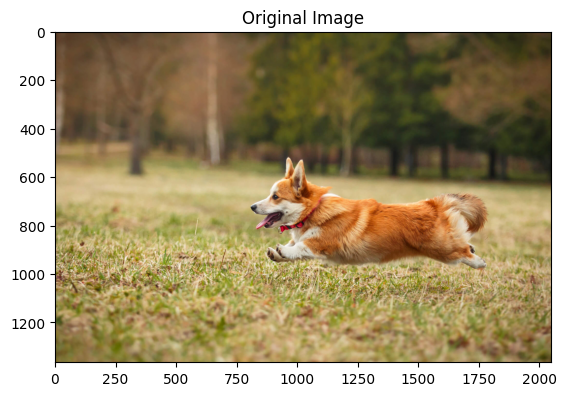

Cropped image shape: (700, 700, 3)


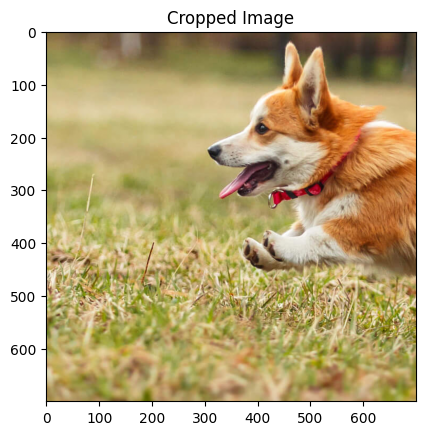

/usr/local/lib/python3.10/dist-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


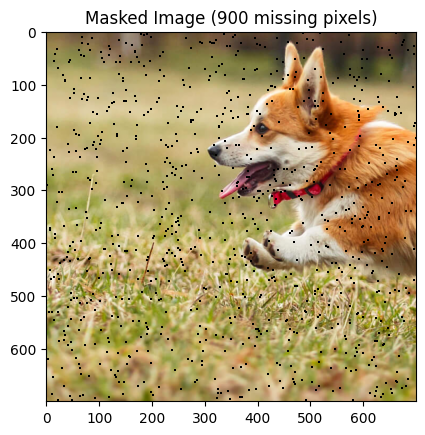

Channel 0, Epoch 0/1000, Loss: 50.05244827270508
Channel 0, Epoch 100/1000, Loss: 3.6633810997009277
Channel 0, Epoch 200/1000, Loss: 0.34488168358802795
Channel 0, Epoch 300/1000, Loss: 0.04291924089193344
Channel 0, Epoch 400/1000, Loss: 0.017713865265250206
Channel 0, Epoch 500/1000, Loss: 0.014352203346788883
Channel 0, Epoch 600/1000, Loss: 0.013612248934805393
Channel 0, Epoch 700/1000, Loss: 0.013313203118741512
Channel 0, Epoch 800/1000, Loss: 0.01306035928428173
Channel 0, Epoch 900/1000, Loss: 0.012697138823568821
Channel 1, Epoch 0/1000, Loss: 50.00673294067383
Channel 1, Epoch 100/1000, Loss: 3.530034065246582
Channel 1, Epoch 200/1000, Loss: 0.35681846737861633
Channel 1, Epoch 300/1000, Loss: 0.04677184298634529
Channel 1, Epoch 400/1000, Loss: 0.01996135152876377
Channel 1, Epoch 500/1000, Loss: 0.016207346692681313
Channel 1, Epoch 600/1000, Loss: 0.015231357887387276
Channel 1, Epoch 700/1000, Loss: 0.014653338119387627
Channel 1, Epoch 800/1000, Loss: 0.01400282885879

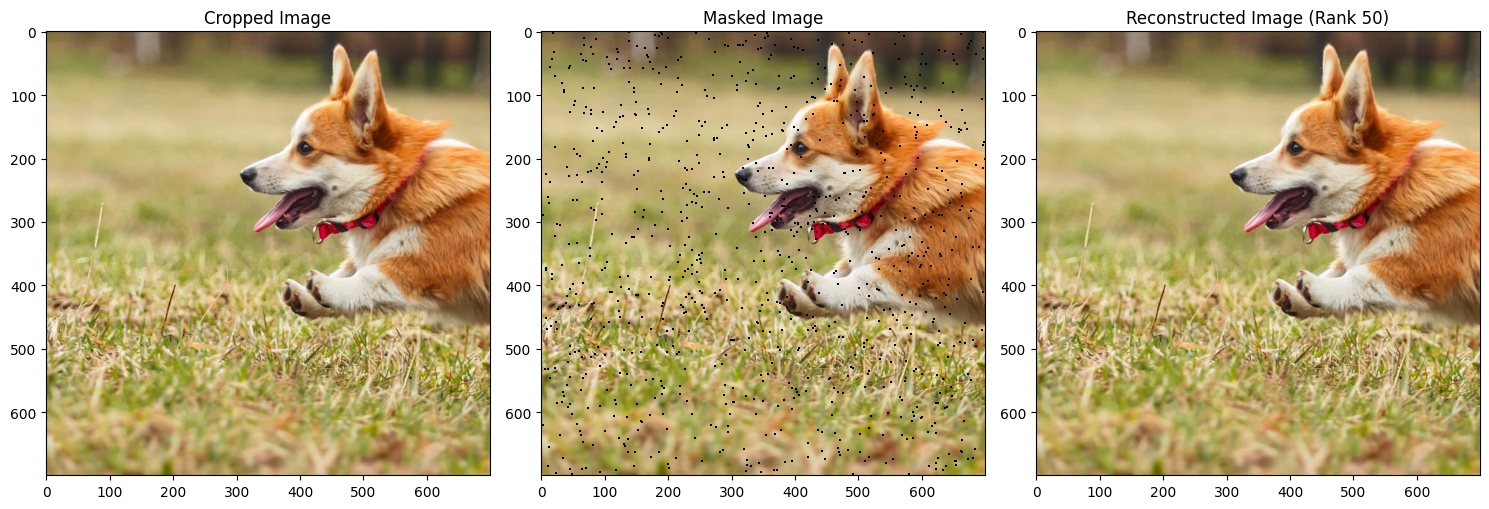

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from PIL import Image

# Load the color image
img = Image.open('dog.jpg')
img = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
print(f"Original image shape: {img.shape}")

# Display the original image
plt.imshow(img)
plt.title("Original Image")
plt.axis('on')
plt.show()

crop_box = (500,500, 1200,1200)  # Example: cropping a 1100x1100 box starting at (100, 100)
cropped_img = Image.fromarray((img * 255).astype(np.uint8)).crop(crop_box)
cropped_img = np.array(cropped_img) / 255.0  # Normalize again after cropping
print(f"Cropped image shape: {cropped_img.shape}")

# Display the cropped image
plt.imshow(cropped_img)
plt.title("Cropped Image")
plt.axis('on')
plt.show()

# Mask 900 random pixels for each channel
def mask_image_with_nan(image, num_missing=900):
    masked_image = image.copy()
    m, n, c = masked_image.shape
    total_pixels = m * n
    flat_indices = np.random.choice(total_pixels, num_missing, replace=False)
    mask = np.zeros((m, n), dtype=bool).reshape(-1)
    mask[flat_indices] = True
    mask = mask.reshape((m, n))
    masked_image[mask] = np.nan
    return masked_image, mask

masked_img, mask = mask_image_with_nan(cropped_img, 900)

# Display the masked image
plt.imshow(masked_img)
plt.title("Masked Image (900 missing pixels)")
plt.axis('on')
plt.show()

# Matrix Factorization on each channel separately
def matrix_factorization_with_mask_color(R, mask, r, lr=0.01, epochs=1000):
    """
    Perform matrix factorization on a color image with missing pixels using gradient descent.
    """
    m, n, c = R.shape
    W_list = []
    H_list = []
    loss_history = []

    for channel in range(c):
        R_channel = R[:, :, channel]
        mask_channel = mask

        # Initialize matrices
        W = torch.randn(m, r, requires_grad=True, device=device)
        H = torch.randn(r, n, requires_grad=True, device=device)

        optimizer = torch.optim.Adam([W, H], lr=lr)

        # Replace NaN values with 0 for computation, but use the mask to ignore them in loss
        R_tensor = torch.tensor(np.nan_to_num(R_channel), dtype=torch.float32, device=device)
        mask_tensor = torch.tensor(~mask_channel, dtype=torch.float32, device=device)  # Invert mask to use as weights (1 for known pixels)

        for epoch in range(epochs):
            optimizer.zero_grad()
            R_hat = torch.mm(W, H)
            # Calculate loss only over known pixels
            loss = torch.mean((R_hat * mask_tensor - R_tensor * mask_tensor) ** 2)  # Mean Squared Error
            loss.backward()
            optimizer.step()

            loss_history.append(loss.item())
            if epoch % 100 == 0:
                print(f"Channel {channel}, Epoch {epoch}/{epochs}, Loss: {loss.item()}")

        W_list.append(W)
        H_list.append(H)

    return W_list, H_list, loss_history

# Ensure device is set (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Apply matrix factorization for each channel
r = 50  # Adjust this value as necessary
W_list, H_list, loss_history = matrix_factorization_with_mask_color(masked_img, mask, r, lr=0.01, epochs=1000)

# Reconstruct the image for each channel
reconstructed_img = np.zeros_like(cropped_img)
for channel in range(cropped_img.shape[2]):
    W = W_list[channel]
    H = H_list[channel]
    reconstructed_channel = torch.mm(W, H).detach().cpu().numpy()
    reconstructed_img[:, :, channel] = reconstructed_channel

# Fill the missing pixels in the original masked image
reconstructed_img_with_missing = masked_img.copy()
for channel in range(cropped_img.shape[2]):
    reconstructed_img_with_missing[:, :, channel][np.isnan(masked_img[:, :, channel])] = reconstructed_img[:, :, channel][np.isnan(masked_img[:, :, channel])]

# Display the original, masked, and reconstructed images side by side
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Cropped image
ax[0].imshow(cropped_img)
ax[0].set_title("Cropped Image")
ax[0].axis('on')

# Masked image
ax[1].imshow(masked_img)
ax[1].set_title("Masked Image")
ax[1].axis('on')

# Reconstructed image
ax[2].imshow(reconstructed_img_with_missing)
ax[2].set_title(f"Reconstructed Image (Rank {r})")
ax[2].axis('on')

plt.tight_layout()
plt.show()

In [ ]:
rmse, psnr = calculate_metrics(cropped_img,reconstructed_img_with_missing)
print(f"RMSE: {rmse:.5f}")
print(f"PSNR: {psnr:.2f} dB")

RMSE: 0.00513
PSNR: 45.79 dB


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.kernel_approximation import RBFSampler
from sklearn.metrics import mean_squared_error

def rff_linear_regression_reconstruction(masked_image):
    # Initialize an empty array to store the reconstructed image
    reconstructed_image = np.zeros_like(masked_image)

    # Iterate over each color channel
    for channel in range(masked_image.shape[0]):
        # Extract the channel
        channel_data = masked_image[channel, :, :]

        # Flatten the image
        rows, cols = channel_data.shape
        pixel_indices = np.indices((rows, cols)).reshape(2, -1).T
        pixel_values = channel_data.flatten()

        # Create mask for missing values
        missing_mask = np.isnan(pixel_values)

        # Extract known values for training
        known_indices = ~missing_mask
        known_pixels = pixel_values[known_indices]
        known_pixel_coords = pixel_indices[known_indices]

        # Create Random Fourier Features
        rbf_feature = RBFSampler(gamma=1, n_components=100, random_state=0)
        X_features = rbf_feature.fit_transform(pixel_indices)
        X_known_features = X_features[~missing_mask]

        # Train Linear Regression
        model = LinearRegression()
        model.fit(X_known_features, known_pixels)

        # Predict missing values
        X_missing_features = X_features[missing_mask]
        predicted_pixels = model.predict(X_missing_features)

        # Reconstruct the channel
        reconstructed_channel_flat = pixel_values.copy()
        reconstructed_channel_flat[missing_mask] = predicted_pixels
        reconstructed_image[channel, :, :] = reconstructed_channel_flat.reshape(rows, cols)

    return reconstructed_image


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.kernel_approximation import RBFSampler
import matplotlib.pyplot as plt

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.kernel_approximation import RBFSampler

def rff_linear_regression_reconstruction(masked_image):
    # Initialize an empty array to store the reconstructed image
    reconstructed_image = np.zeros_like(masked_image)

    # Iterate over each color channel (first dimension in masked_image)
    for channel in range(masked_image.shape[0]):
        # Extract the channel
        channel_data = masked_image[channel, :, :]

        # Flatten the image
        rows, cols = channel_data.shape
        pixel_indices = np.indices((rows, cols)).reshape(2, -1).T
        pixel_values = channel_data.flatten()

        # Create mask for missing values
        missing_mask = np.isnan(pixel_values)

        # Extract known values for training
        known_indices = ~missing_mask
        known_pixels = pixel_values[known_indices]
        known_pixel_coords = pixel_indices[known_indices]

        # Ensure that there are enough known pixels for training
        if len(known_pixels) == 0:
            print(f"No known pixels available in channel {channel} for training. Skipping this channel.")
            continue

        # Create Random Fourier Features
        rbf_feature = RBFSampler(gamma=1, n_components=100, random_state=0)
        X_features = rbf_feature.fit_transform(pixel_indices)
        X_known_features = X_features[~missing_mask]

        # Train Linear Regression
        model = LinearRegression()
        model.fit(X_known_features, known_pixels)

        # Predict missing values if there are missing pixels
        if missing_mask.any():
            X_missing_features = X_features[missing_mask]
            predicted_pixels = model.predict(X_missing_features)

            # Reconstruct the channel
            reconstructed_channel_flat = pixel_values.copy()
            reconstructed_channel_flat[missing_mask] = predicted_pixels
            reconstructed_image[channel, :, :] = reconstructed_channel_flat.reshape(rows, cols)
        else:
            # If no missing values, retain the original channel
            reconstructed_image[channel, :, :] = channel_data

    return reconstructed_image


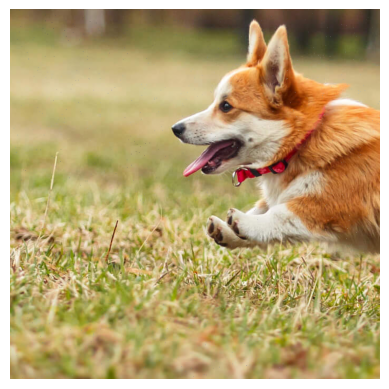

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
image_using_linear = rff_linear_regression_reconstruction(masked_img)

# Check the shape of the image and ensure channels are the last dimension
if image_using_linear.shape[0] == 3 and len(image_using_linear.shape) == 3:
    # Transpose the image from (channels, height, width) to (height, width, channels)
    image_using_linear = np.transpose(image_using_linear, (1, 2, 0))

# Ensure that the values are in the range [0, 1] or [0, 255]
image_using_linear = np.clip(image_using_linear, 0, 1)

# Display the image
plt.imshow(image_using_linear)
plt.axis('off')  # Turn off axis labels
plt.show()


In [ ]:
rmse, psnr = calculate_metrics(cropped_img,image_using_linear)
print(f"RMSE: {rmse:.2f}")
print(f"PSNR: {psnr:.2f} dB")

RMSE: 0.01
PSNR: 41.70 dB
